In [88]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity_error()
import os
import zipfile
import warnings
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from transformers import Trainer, TrainingArguments, AutoModelForImageClassification
from torch import nn
from PIL import Image
from torchvision import transforms
from transformers import AutoModelForImageClassification, AutoProcessor
import matplotlib.pyplot as plt
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from transformers import Trainer, TrainingArguments, AutoModelForImageClassification
# import evaluate
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image


warnings.filterwarnings("ignore")


In [89]:
def convert_to_rgb(image):
    return image.convert('RGB')

# Fruit Model

In [90]:
import os
import zipfile
data_zip_path = "archive(3).zip"
data_dir = "MY_data"

if not os.path.exists(data_dir):
    with zipfile.ZipFile(data_zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)


In [91]:
dataset_dir = 'MY_data/train'
test_dataset_dir = 'MY_data/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [92]:
class CustomImageDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.transform = transform
        self.data = datasets.ImageFolder(image_folder)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return {"pixel_values": image, "labels": torch.tensor(label)}


In [93]:
frt_train = CustomImageDataset(dataset_dir, transform=transform)
frt_test = CustomImageDataset(test_dataset_dir, transform=transform)

frt_train_loader = DataLoader(frt_train, batch_size=32, shuffle=True)
frt_test_loader = DataLoader(frt_test, batch_size=32, shuffle=False)
print(f"Number of classes in the dataset: {len(frt_train.data.classes)}")

FRUITmodel = AutoModelForImageClassification.from_pretrained(
    'Kaludi/food-category-classification-v2.0',
    num_labels=len(frt_train.data.classes) + 1,
    ignore_mismatched_sizes=True
)

device = torch.device("cpu")
FRUITmodel.to(device)

for i in range(5):
    image, label = frt_train[i]
    print(f"Label {i}: {label}")

for param in FRUITmodel.base_model.parameters():
    param.requires_grad = False

FRUITmodel.classifier = nn.Linear(FRUITmodel.config.hidden_size, len(frt_train.data.classes) + 1)

Number of classes in the dataset: 10
Label 0: labels
Label 1: labels
Label 2: labels
Label 3: labels
Label 4: labels


## Fruit model training

In [94]:
# training_args = TrainingArguments(
#     output_dir='./results',
#     evaluation_strategy="epoch",
#     learning_rate=5e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     save_total_limit=3,
#     logging_dir='./logs',
#     logging_steps=50,
# )

# trainer = Trainer(
#     model=FRUITmodel,
#     args=training_args,
#     train_dataset=frt_train,
#     eval_dataset=frt_test,
#     data_collator=None,
# )

# trainer.train()

# FRUITmodel.save_pretrained('./trained_FRUITmodel')

# eval_results = trainer.evaluate()
# print(f"Evaluation results after first training: {eval_results}")


# Vegetaribles

In [95]:
veg_train_dir = 'Vegetable_Images/train'
veg_test_dir = 'Vegetable_Images/test'

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
veg_train = CustomImageDataset(veg_train_dir, transform=transform)
veg_test = CustomImageDataset(veg_test_dir, transform=transform)

veg_train_loader = DataLoader(veg_train, batch_size=32, shuffle=True)
veg_test_loader = DataLoader(veg_test, batch_size=32, shuffle=False)
print(f"Number of classes in the dataset: {len(veg_train.data.classes)}")

VEGmodel = AutoModelForImageClassification.from_pretrained(
    'Kaludi/food-category-classification-v2.0',
    num_labels=len(veg_train.data.classes) + 1,
    ignore_mismatched_sizes=True
)
device = torch.device("cpu")
VEGmodel.to(device)

for i in range(5):
    image, label = veg_train[i]
    print(f"Label {i}: {label}")

for param in VEGmodel.base_model.parameters():
    param.requires_grad = False

VEGmodel.classifier = nn.Linear(VEGmodel.config.hidden_size, len(veg_train.data.classes) + 1)

Number of classes in the dataset: 15
Label 0: labels
Label 1: labels
Label 2: labels
Label 3: labels
Label 4: labels


## VEG model training

In [96]:
# veg_training_args = TrainingArguments(
#     output_dir='./ver_results',
#     evaluation_strategy="epoch",
#     learning_rate=5e-5,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=16,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     save_total_limit=3,
#     logging_dir='./logs',
#     logging_steps=50,
# )

# trainer = Trainer(
#     model=VEGmodel,
#     args=veg_training_args,
#     train_dataset=veg_train,
#     eval_dataset=veg_test,
#     data_collator=None,
# )

# trainer.train()

# VEGmodel.save_pretrained('./trained_VEGmodel')

# eval_results = trainer.evaluate()
# print(f"Evaluation results after first training: {eval_results}")


# Result

In [97]:
VEGmodel_path = './trained_VEGmodel'
VEGmodel = AutoModelForImageClassification.from_pretrained(VEGmodel_path)
VEGmodel.eval()

FRUITmodel_path = './trained_model'
FRUITmodel = AutoModelForImageClassification.from_pretrained(FRUITmodel_path)
FRUITmodel.eval()

modelId = "Kaludi/food-category-classification-v2.0"
model = pipeline("image-classification", model=modelId)
model.save_pretrained(save_directory=f"models/{modelId}")

calories = pd.read_csv('calories.csv')
calories['FoodItem'] = calories['FoodItem'].str.lower()

In [98]:
def food_class_classification(image_path, model = model):
    image_raw = Image.open(image_path)
    image = convert_to_rgb(image_raw)
    class_scores=model(image)
    highest_probability = max(class_scores, key=lambda x: x['score'])
    highest_probability_class = highest_probability['label']
    print(f"Predicted food category: {highest_probability_class}")
    return highest_probability_class

def predict_image(image_path, model, train):
    classes = train.data.classes + ["new_class"]
    image_raw = Image.open(image_path)
    image = convert_to_rgb(image_raw)
    processed_image = transform(image).unsqueeze(0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    processed_image = processed_image.to(device)

    with torch.no_grad():
        outputs = model(processed_image)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        top_prob, top_class_idx = torch.max(probabilities, dim=1)

    predicted_class = classes[top_class_idx.item()]
    confidence = top_prob.item()

    return predicted_class, confidence

def result(image):
    food_class = food_class_classification(image)
    if food_class == 'Fruit' or food_class == 'Vegetable':
        if food_class == 'Fruit':
            predicted_category, confidence = predict_image(image, FRUITmodel, frt_train)
        elif food_class == 'Vegetable':
            predicted_category, confidence = predict_image(image, VEGmodel, veg_train)
        plt.imshow(Image.open(image))
        plt.axis('off')
        plt.title(f"Predicted: {predicted_category} ({confidence*100:.2f}%)")
        plt.show()

        predicted_category_lower = predicted_category.lower()
        print('Calories per 100g for', predicted_category, 'is', calories[calories['FoodItem'] == predicted_category_lower]['Cals_per100grams'].values[0])
        print('Energy per 100g for', predicted_category, 'is', calories[calories['FoodItem'] == predicted_category_lower]['KJ_per100grams'].values[0])
    else:
        print("Sorry! I only know how to recognize fruits and vegetables:) \n But my parents will teach me new products soon!")
        plt.imshow(Image.open(image))
        plt.axis('off')
        return

Predicted food category: Fruit


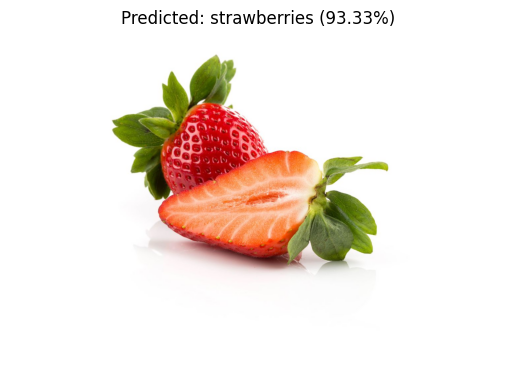

Calories per 100g for strawberries is 32 cal
Energy per 100g for strawberries is 134 kJ


In [99]:
result('Fiber-Fruits-Strawberries-GettyImages-1675481388-e37bd6bfe3f345b9887fda43972060a7.jpg')

Predicted food category: Vegetable


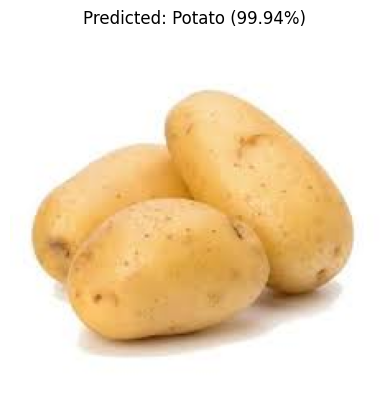

Calories per 100g for Potato is 77 cal
Energy per 100g for Potato is 323 kJ


In [100]:
result('potato.jpeg')

Predicted food category: Rice
Sorry! I only know how to recognize fruits and vegetables:) 
 But my parents will teach me new products soon!


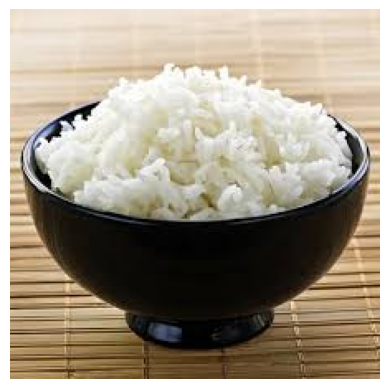

In [101]:
result('food_1.jpeg')